<a href="https://colab.research.google.com/github/VikashhAdaikalavan/Digit-Recogniser/blob/main/Digitrecogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -q kaggle

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:

!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c digit-recognizer


 65% 10.0M/15.3M [00:00<00:00, 104MB/s]
100% 15.3M/15.3M [00:00<00:00, 137MB/s]


In [ ]:
! unzip digit-recognizer.zip


Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier


data set processing

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
#converting to numpy array leaving the first coloumn
X = df[df.columns[1:]].values
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y = df.iloc[:, [0]].values
Y[0:5]

array([[1],
       [0],
       [1],
       [4],
       [0]])

Train test split

In [ ]:
#df2 = pd.read_csv('test.csv')
#df2.head()

In [ ]:
#df2.columns

In [ ]:
#converting to numpy array leaving the first coloumn
#xtest = df2.values
#xtest[0:5]

In [ ]:
#ytest = df2.iloc[:, [0]].values
#ytest[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size=0.2, random_state=4)

In [ ]:
#checking the dataset size
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (33600, 784) (33600, 1)
Test set: (8400, 784) (8400, 1)


In [83]:
#model decleration and training
k = 10
model = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [84]:
yr = model.predict(xtest)
yr[0:5]

array([0, 4, 0, 3, 7])

In [ ]:
df3 = pd.DataFrame(yr)
df3.head()

,0
0,0
1,4
2,0
3,3
4,7


In [85]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, model.predict(xtrain)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, yr))

Train set Accuracy:  0.9706547619047619
Test set Accuracy:  0.9610714285714286


(784,)
(1, 784)
(28, 28)


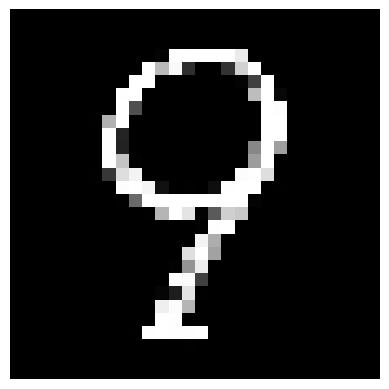

In [142]:
import cv2
import numpy as np

# Load the original image
image = cv2.imread('/content/numbers/nine.png')

grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to 28x28 pixels
resized_image = cv2.resize(grey_image, (28, 28))
inverted_colour_image = cv2.bitwise_not(resized_image)

# Flatten the 28x28 image into a 1D array with 784 pixels
flattened_image = inverted_colour_image.flatten()

print(flattened_image.shape)

reshape_image = flattened_image.reshape((1, 784))
print(reshape_image.shape)


print(image_array.shape)
plt.imshow(cv2.cvtColor(inverted_colour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()




In [143]:
ans = model.predict(reshape_image)
print(ans)

[9]
